In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import StrMethodFormatter
from datetime import datetime, timezone

In [49]:
# Save data in a DataFrame
data = pd.read_csv('/content/clean_secular_talk_data.csv')

In [50]:
# Clean date column
data['publishedAt'] = pd.to_datetime(data['publishedAt'])

In [51]:
# Explore data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   videoId           19999 non-null  object             
 1   title             19999 non-null  object             
 2   description       19622 non-null  object             
 3   tags              19570 non-null  object             
 4   publishedAt       19999 non-null  datetime64[ns, UTC]
 5   duration          19999 non-null  object             
 6   category          19999 non-null  object             
 7   viewCount         19999 non-null  int64              
 8   likeCount         19999 non-null  int64              
 9   commentCount      19998 non-null  float64            
 10  duration_seconds  19999 non-null  int64              
 11  duration_minutes  19999 non-null  float64            
 12  duration_hours    19999 non-null  float64            
dtypes

In [52]:
# function to generate dictionary of total views at multiple time frequencies

def calculate_total_views(df):
    """
    Calculate total views at multiple time frequencies.

    """

    data = df.copy()

    # Ensure datetime (already true in your df, but safe)
    data["publishedAt"] = pd.to_datetime(data["publishedAt"])

    totals = {
        "daily_total_views": (data.groupby(data["publishedAt"].dt.date)["viewCount"].sum()),
        "weekly_total_views": (data.groupby(data["publishedAt"].dt.to_period("W"))["viewCount"].sum()),
        "monthly_total_views": (data.groupby(data["publishedAt"].dt.to_period("M"))["viewCount"].sum()),
        "yearly_total_views": (data.groupby(data["publishedAt"].dt.to_period("Y"))["viewCount"].sum()),
    }

    return totals

In [53]:
# function to filter dates

def filter_time_series_by_date(series, start=None, end=None):
    """
    Filter a time-indexed pandas Series by date range.

    """

    s = series.copy()

    # Normalize index to Timestamp for comparison
    if isinstance(s.index, pd.PeriodIndex):
        s.index = s.index.to_timestamp()
    else:
        s.index = pd.to_datetime(s.index)

    if start is not None:
        s = s.loc[s.index >= pd.to_datetime(start)]

    if end is not None:
        s = s.loc[s.index <= pd.to_datetime(end)]

    return s

In [54]:
def plot_monthly_views_by_year(total_views_series):
    """
    Plot non-stacked grouped bar chart of monthly total views,
    comparing multiple years.

    """

    series = total_views_series.copy()

    # Normalize index to Timestamp
    if isinstance(series.index, pd.PeriodIndex):
        series.index = series.index.to_timestamp()

    # Build DataFrame with year and month
    df = (
        series
        .rename("views")
        .to_frame()
        .assign(
            year=lambda x: x.index.year,
            month=lambda x: x.index.month
        )
    )

    # Pivot: months as rows, years as columns
    pivot = (
        df
        .groupby(["year", "month"])["views"]
        .sum()
        .unstack("year")
        .sort_index()
    )

    # Plot
    pivot.plot(
        kind="bar",
        figsize=(12, 6),
        width=0.8
    )

    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

    plt.xlabel("Month")
    plt.ylabel("Total Views")
    plt.title("Monthly Total Views by Year")
    plt.grid(axis="y", alpha=0.3)
    plt.legend(title="Year")
    plt.tight_layout()
    plt.show()


In [55]:
def plot_monthly_views_by_year_line(total_views_series):
    """
    Plot line chart of monthly total views, comparing multiple years.

    """
    series = total_views_series.copy()

    # Normalize index to Timestamp
    if isinstance(series.index, pd.PeriodIndex):
        series.index = series.index.to_timestamp()

    # Build DataFrame with year and month
    df = (
        series
        .rename("views")
        .to_frame()
        .assign(
            year=lambda x: x.index.year,
            month=lambda x: x.index.month
        )
    )

    # Pivot: months as rows, years as columns
    pivot = (
        df
        .groupby(["year", "month"])["views"]
        .sum()
        .unstack("year")
        .sort_index()
    )

    # Plot
    pivot.plot(
        kind="line",
        figsize=(12, 6),
    )

    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

    plt.xlabel("Month")
    plt.ylabel("Total Views")
    plt.title("Monthly Total Views by Year")
    plt.grid(True, alpha=0.3)
    plt.legend(title="Year")
    plt.tight_layout()
    plt.show()


In [56]:
# dictionary with total views at multiple time frequencies
totals = calculate_total_views(data)
monthly_views = totals["monthly_total_views"]
weekly_views = totals["weekly_total_views"]

/tmp/ipython-input-869172498.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "weekly_total_views": (data.groupby(data["publishedAt"].dt.to_period("W"))["viewCount"].sum()),
/tmp/ipython-input-869172498.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "monthly_total_views": (data.groupby(data["publishedAt"].dt.to_period("M"))["viewCount"].sum()),
/tmp/ipython-input-869172498.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "yearly_total_views": (data.groupby(data["publishedAt"].dt.to_period("Y"))["viewCount"].sum()),


In [57]:
# filter data
filtered_months = filter_time_series_by_date(
    monthly_views,
    start="2015-01",
    end="2025-12"
)
filtered_weeks = filter_time_series_by_date(
    weekly_views,
    start="2015-01-01",
    end="2025-12-31"
)

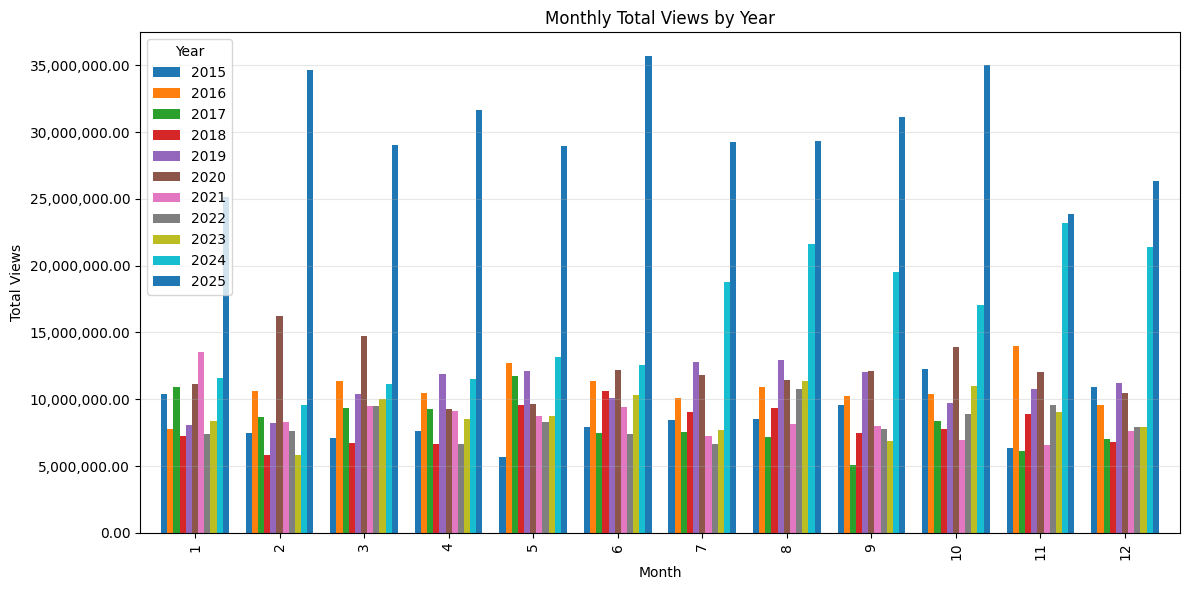

In [58]:
# bar chart
plot_monthly_views_by_year(filtered_months)

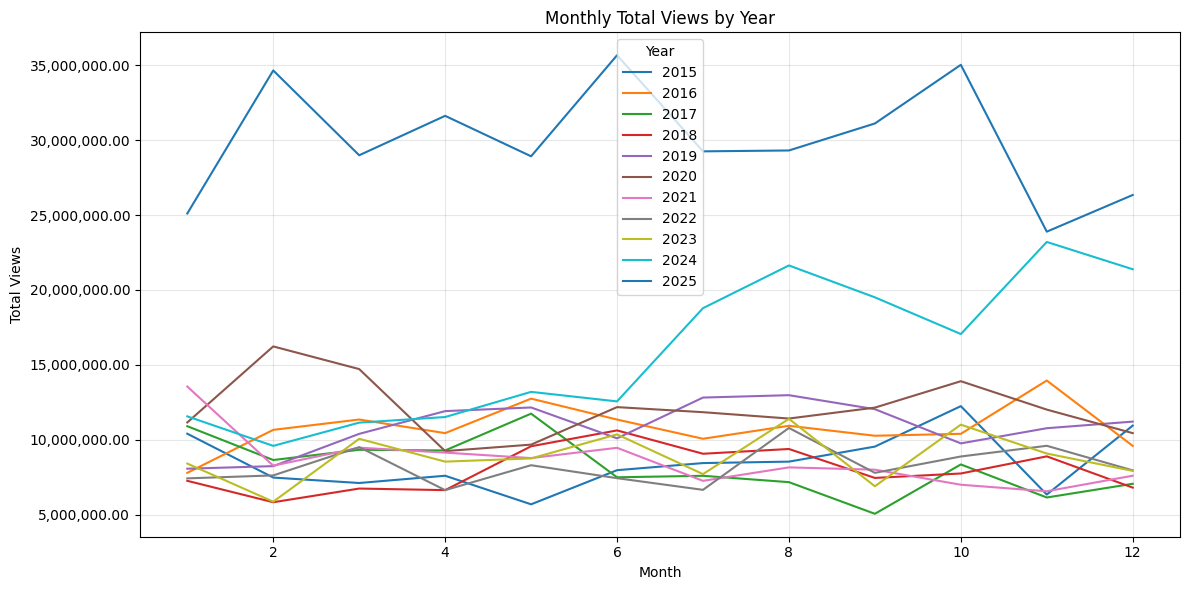

In [59]:
# line graph
plot_monthly_views_by_year_line(filtered_months)

In [60]:
def plot_weekly_views(filtered_weeks):
    """
    Plot weekly total views as a line chart.
    """

    series = filtered_weeks.copy()

    # Ensure datetime index
    if hasattr(series.index, "to_timestamp"):
        series.index = series.index.to_timestamp()

    plt.figure(figsize=(12, 6))
    plt.plot(series.index, series.values)
    plt.xlabel("Week")
    plt.ylabel("Total Views")
    plt.title("Weekly Total Views")
    plt.grid(True, alpha=0.3)

    # Format Y axis: 1,000.00
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

    plt.tight_layout()
    plt.show()

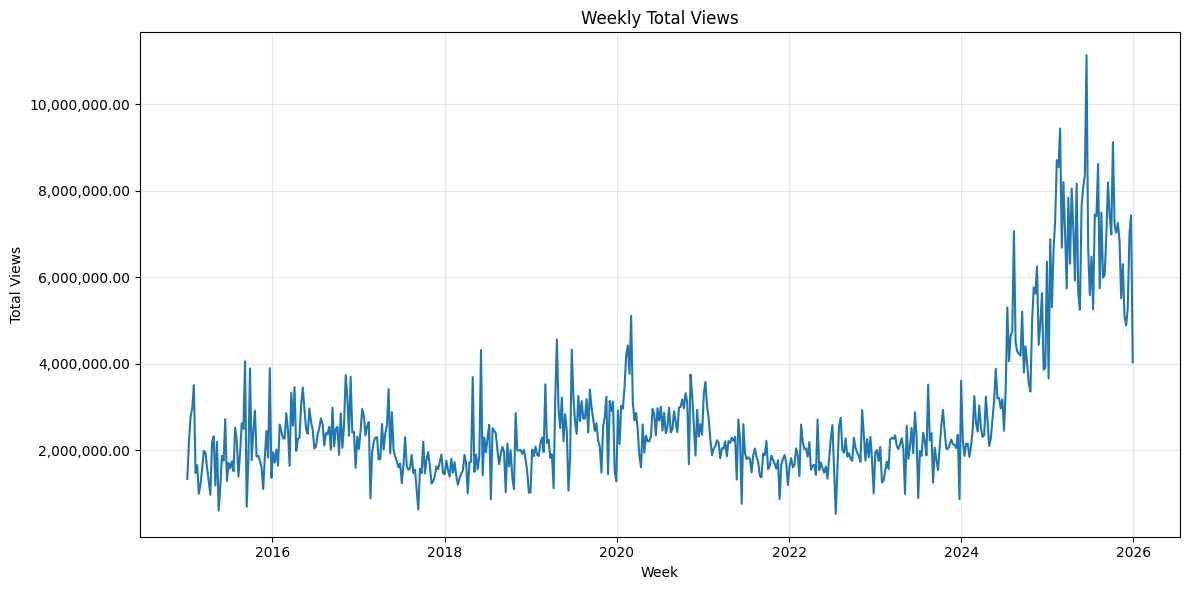

In [61]:
plot_weekly_views(filtered_weeks)
